# CS 109A Data Science: AirBnB Pricing Predictions - Milestone #3
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, November 5th, 2016 at 11:59pm

#### By Ayo Opeyemi, Chase Davis, & Dino Rodriguez

### Import Libaries:

In [117]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from collections import Counter
%matplotlib inline

### Step 1: Import listings, clean data, and extract features
<p> We begin by importing the data. A visual examination reveals missing values across several columns.</p>
* TODO: Clean data and fill in missing values
* TODO: Extract appropriate features

In [118]:
# Read in the data 
listings = pd.read_csv('listings.csv', delimiter=',')

# Visualize initial data
listings.head(n = 3)

,id,scrape_id,last_scraped,name,picture_url,host_id,host_name,host_since,host_picture_url,street,...,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count
0,1069266,2.015010e+13,1/2/15,Stay like a real New Yorker!,https://a0.muscache.com/pictures/50276484/larg...,5867023,Michael,4/10/13,https://a2.muscache.com/ic/users/5867023/profi...,"East 53rd Street, New York, NY 10022, United S...",...,4/28/13,12/17/14,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1
1,1846722,2.015010e+13,1/2/15,Apartment 20 Minutes Times Square,https://a1.muscache.com/pictures/35865039/larg...,2631556,Denise,6/13/12,https://a2.muscache.com/ic/users/2631556/profi...,"West 155th Street, New York, NY, United States",...,1/5/14,12/29/14,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2
2,2061725,2.015010e+13,1/2/15,Option of 2 Beds w Private Bathroom,https://a2.muscache.com/pictures/50650147/larg...,4601412,Miao,1/5/13,https://a0.muscache.com/ic/users/4601412/profi...,"Van Buren Street, Brooklyn, NY 11221, United S...",...,2/4/14,12/29/14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4


In [170]:
listings['price'] = listings["price"].apply(lambda s:float(s[1:].replace(',','')))

Number of Neighborhoods:  186


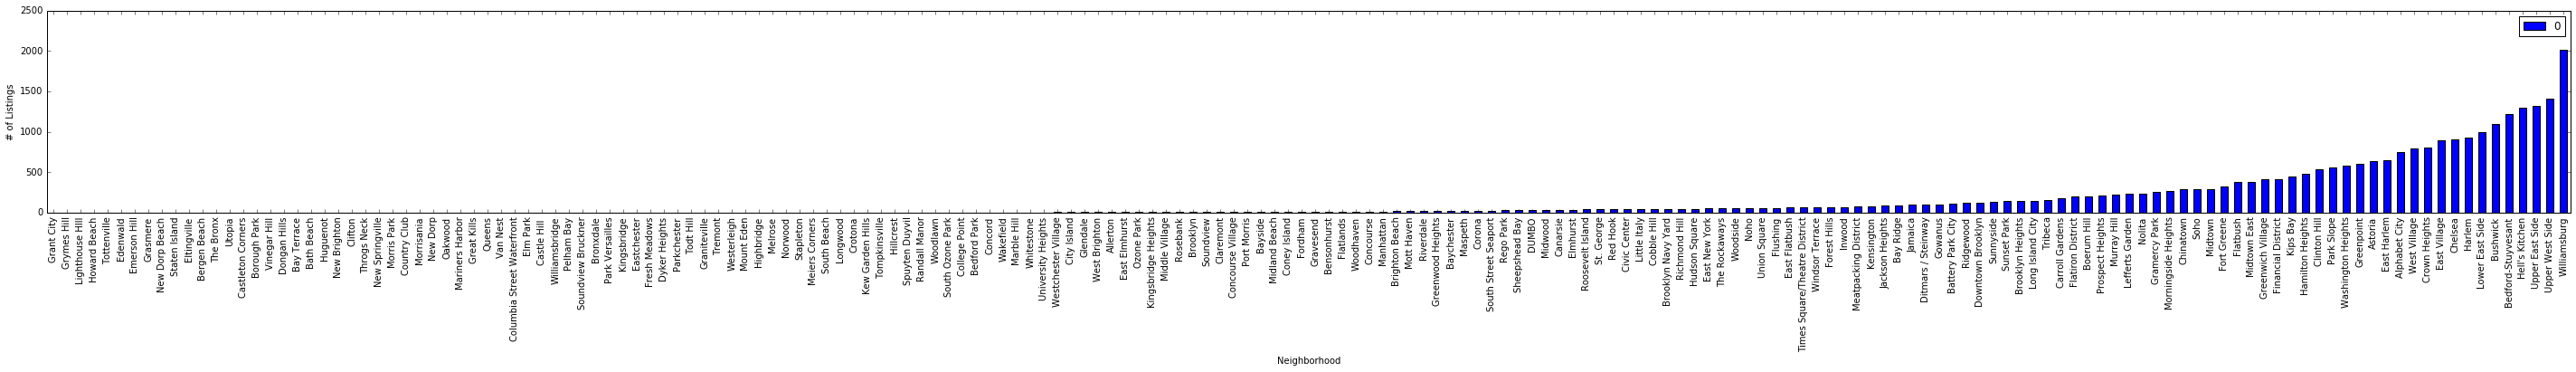

In [155]:
# Variation of method at https://www.mapr.com/blog/predicting-airbnb-listing-prices-scikit-learn-and-apache-spark

nb_counts = Counter(listings.neighbourhood_cleansed)

print 'Number of Neighborhoods: ', len(nb_counts)

tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
ax = tdf.plot(kind='bar', figsize = (50,4))
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")
plt.show()

##### Double click the above plot to view suppressed output!

Number of Neighborhoods:  48


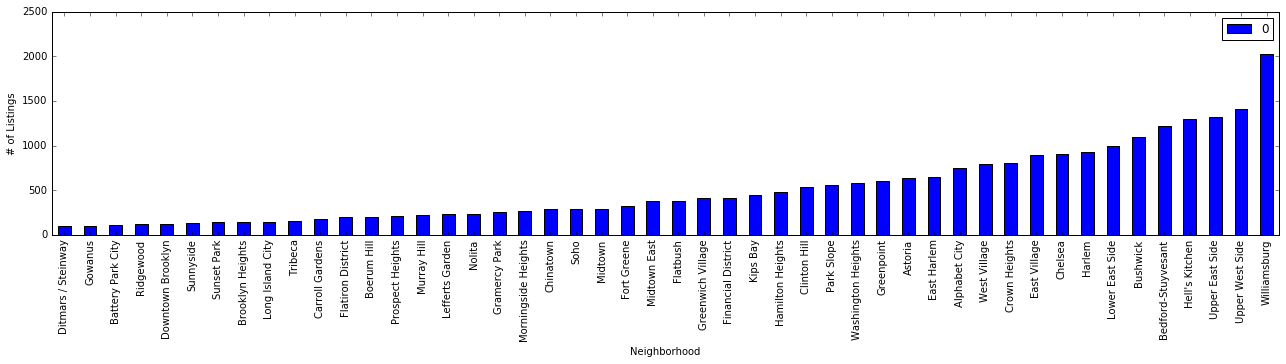

In [160]:
nb_counts = Counter(listings.neighbourhood_cleansed)

for frequency in nb_counts.keys():  ## creates a list of all keys
    if nb_counts[frequency] < 100:
        del nb_counts[frequency]
        
print 'Number of Neighborhoods: ', len(nb_counts)

tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
ax = tdf.plot(kind='bar', figsize = (22,4))
ax.set_xlabel("Neighborhood")
ax.set_ylabel("# of Listings")

plt.show()

None


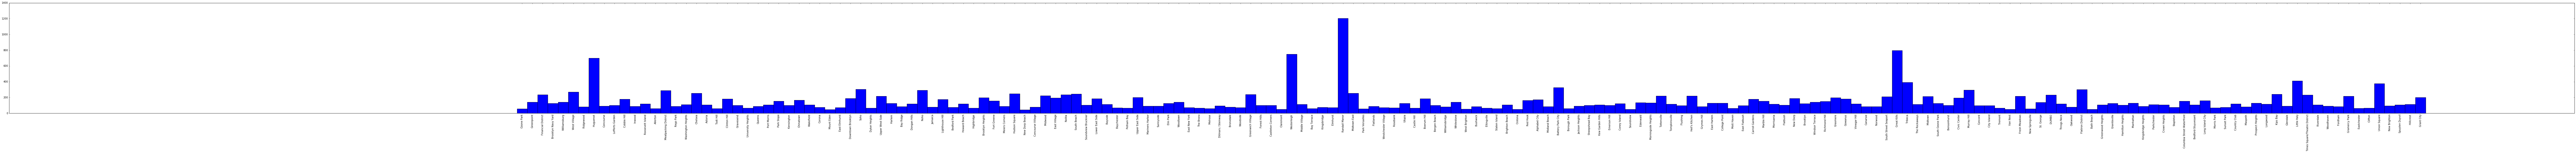

In [216]:
neighborhoods = list(set(listings['neighbourhood_cleansed'].tolist()))
prices = []
for nb in neighborhoods:
    prices.append(np.mean(listings[listings['neighbourhood_cleansed'] == nb]['price'].tolist()))

data = zip(prices, neighborhoods)
print list.sort(data)

plt.figure(figsize=(186, 8))
ax = plt.bar(np.arange(len(prices)), prices, align='center', width = 1)
plt.xticks(np.arange(len(prices)), neighborhoods, rotation = 90)
# for price, neighborhood in zip(prices, neighborhoods):
#     ax.text(rect.get_x() + rect.get_width()/2, price, neighborhood, ha='center', va='bottom')
plt.show()

In [103]:
listings['price'] = listings["price"].apply(lambda s:float(s[1:].replace(',','')))

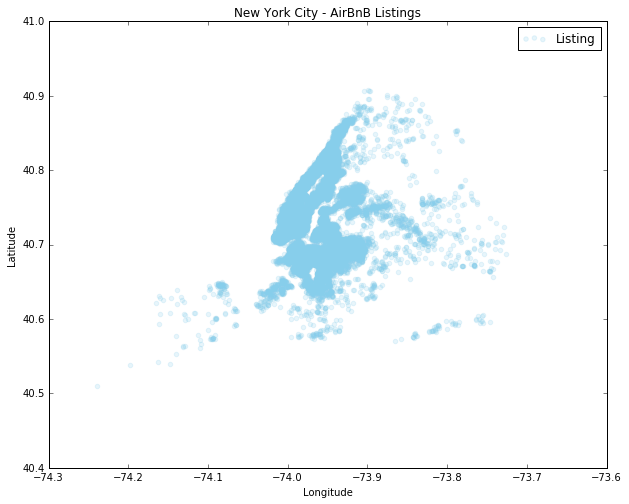

In [89]:
# Plot listings on scatter
plt.figure(figsize=(10, 8))
plt.scatter(listings['longitude'], listings['latitude'], alpha = .2, color = 'skyblue', label = 'Listing') #plot x against y
plt.title('New York City - AirBnB Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc = 'best')

plt.show()

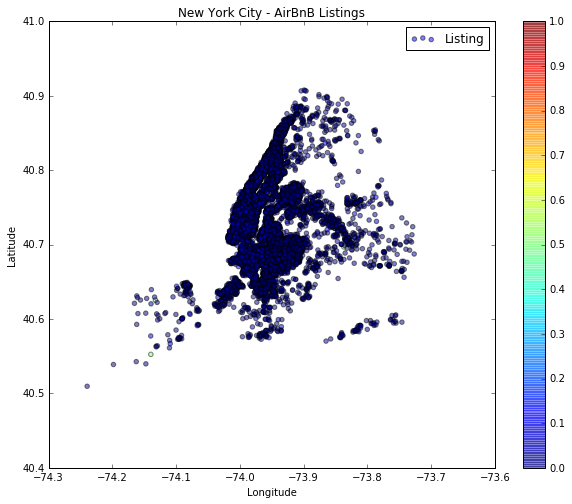

In [115]:
price = listings['price'].tolist()
price_sum = sum(price)
price_max = max(price)
norm = [float(i)/price_sum for i in price]
norm = [float(i)/max(norm) for i in norm]


# Plot listings on scatter
plt.figure(figsize=(10, 8))
plt.scatter(listings['longitude'], listings['latitude'], alpha = .5, c = norm, label = 'Listing') #plot x against y
plt.title('New York City - AirBnB Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc = 'best')

plt.colorbar()
plt.show()

In [113]:
listings['price'].describe()

count    27392.000000
mean        29.468787
std         44.140857
min          0.000000
25%          1.000000
50%         11.000000
75%         50.000000
max        999.000000
Name: price, dtype: float64

### Step 2: Explore Data

In [11]:
# Visualize price table
price = listings[['price']]
price.head(n = 5)

,price
0,$160.00
1,$105.00
2,$58.00
3,$185.00
4,$195.00


Visualizing the price table (in the original file as well) reveals that there are no missing values. We can therefore conduct a visual analysis on this target variable.